## Titanic Study
#### Problem Statement: Complete the analysis of what sorts of people were likely to survive. 

In [147]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [148]:
#load the data
dataset=pd.read_csv('C:/Users/Saniya Parveez/Desktop/Datasets-20190723T084832Z-001/Datasets/titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
dataset.shape

(891, 12)

In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


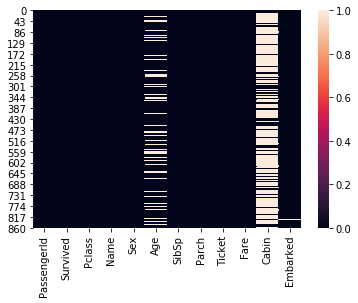

In [151]:
#to find null values
sb.heatmap(dataset.isnull())

In [152]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


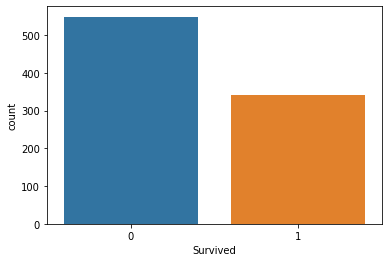

In [153]:
#plot using seaborn libraray
sb.countplot(x='Survived',data=dataset)

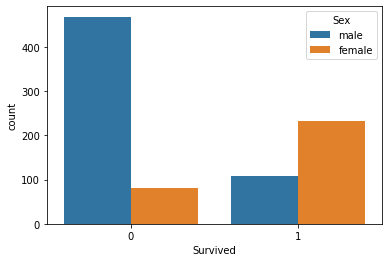

In [154]:
sb.countplot(x='Survived',hue='Sex',data=dataset)

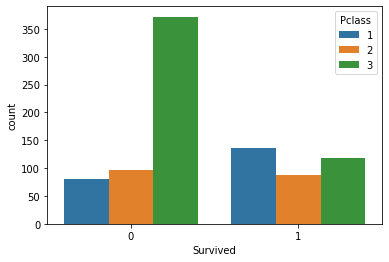

In [155]:
sb.countplot(x='Survived',hue='Pclass',data=dataset)

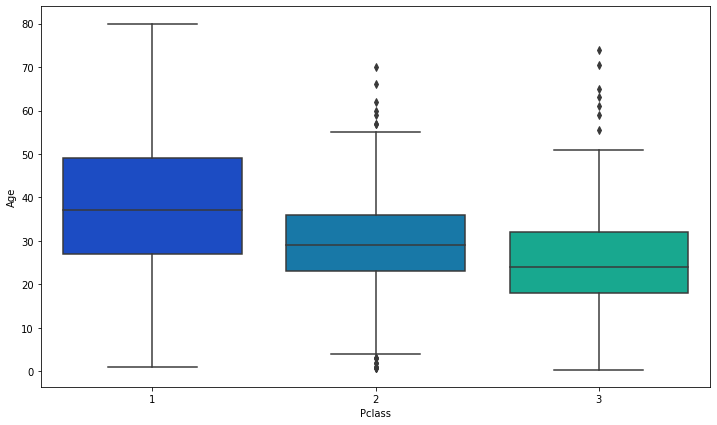

In [156]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [157]:
# fill the missing values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [158]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

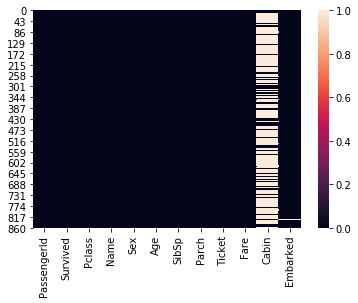

In [159]:
sb.heatmap(dataset.isnull())

In [160]:
#drop the columns of cabin
dataset.drop('Cabin',axis=1,inplace=True)

In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


In [162]:
pd.unique(dataset.Sex)

array(['male', 'female'], dtype=object)

In [163]:
pd.unique(dataset.Embarked)

array(['S', 'C', 'Q', nan], dtype=object)

In [164]:
#to convert into categorical data
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [165]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [166]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [167]:
dataset.shape

(891, 9)

In [168]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1), 
                                                    dataset['Survived'], test_size=0.20, 
                                                    random_state=101)

In [170]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

c:\users\saniya parveez\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [171]:
logmodel.score(X_test,y_test)

0.7988826815642458

In [172]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,1,45.5,0,0,28.500,1,0,1
700,1,18.0,1,0,227.525,0,0,0
748,1,19.0,1,0,53.100,1,0,1
751,3,6.0,0,1,12.475,1,0,1
481,2,29.0,0,0,0.000,1,0,1


In [173]:
logmodel.predict(X_test)[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [174]:
logmodel.predict_proba(X_test)[0:5]

array([[0.69029215, 0.30970785],
       [0.03540391, 0.96459609],
       [0.56386097, 0.43613903],
       [0.82157417, 0.17842583],
       [0.79046271, 0.20953729]])

In [175]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.83      0.69      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[88 11]
 [25 55]]


In [176]:
## Using Random forest gives higher accuracy

In [177]:
from sklearn.ensemble import RandomForestClassifier

#create gaussian classifier
clf = RandomForestClassifier(n_estimators = 100) #estimators: 100 decision trees

#train the model using training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)

In [178]:
#for accuracy calculation
from sklearn import metrics

print("accuracy:",metrics.accuracy_score(y_train,y_pred))

accuracy: 0.9859550561797753


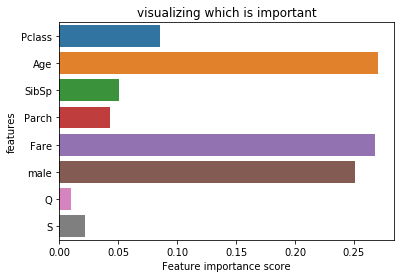

In [179]:
#feature importance

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


feature_imp = pd.Series(clf.feature_importances_ ,index=dataset.columns[1:])
feature_imp

sb.barplot(x= feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('features')
plt.title("visualizing which is important")
plt.show()


In [180]:
#using test data

In [181]:
test_dataset=pd.read_csv('C:/Users/Saniya Parveez/Desktop/Datasets-20190723T084832Z-001/Datasets/titanic_test.csv')
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [182]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [183]:
#fill missing values
test_dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)
test_dataset.fillna(method = 'ffill',inplace=True)

In [184]:
sex_test = pd.get_dummies(test_dataset['Sex'],drop_first =True)
embark_test = pd.get_dummies(test_dataset['Embarked'],drop_first=True)

In [185]:
# Drop redundant values
test_dataset.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis = 1 , inplace =True)

In [186]:
#concatenating encoded columns 'Sex and Embarked' to dataset
test_dataset = pd.concat([test_dataset,sex_test,embark_test],axis =1)

In [187]:
y_pred_test = clf.predict(X_test)
y_pred_test

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)